<a href="https://colab.research.google.com/github/thanujan96/DevFest/blob/main/Google_DevFest_Dementia_Prediction_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and unzipping your dataset
We will first download and unzip our dataset


In [ ]:
!mkdir mri_dataset_dir

In [ ]:
!wget -P mri_dataset_dir -q --show-progress https://talk-assets.s3.amazonaws.com/mri_dataset.zip

mri_dataset.zip     100%[===================>] 379.83M  44.5MB/s    in 13s     


In [ ]:
!unzip -q mri_dataset_dir/mri_dataset.zip -d mri_dataset_dir

## Let's explore our dataset

## Preprocessing and batching

## Let's visualize our preprocessed data

Let's have a look at our training and validation set
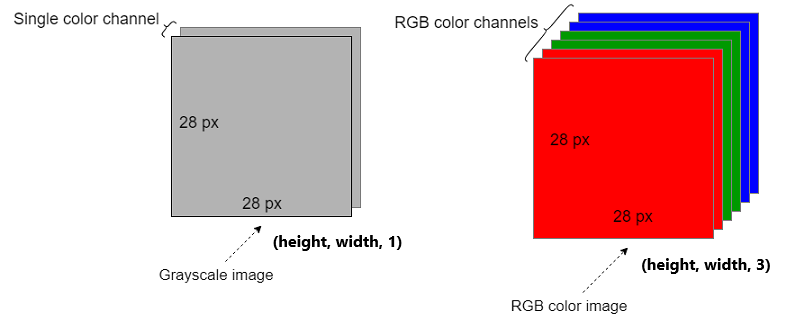

---



## Preprocess and batch training set

## Defining our model architecture

We will be creating a **Convolutional Neural Network** to perform our classification task.
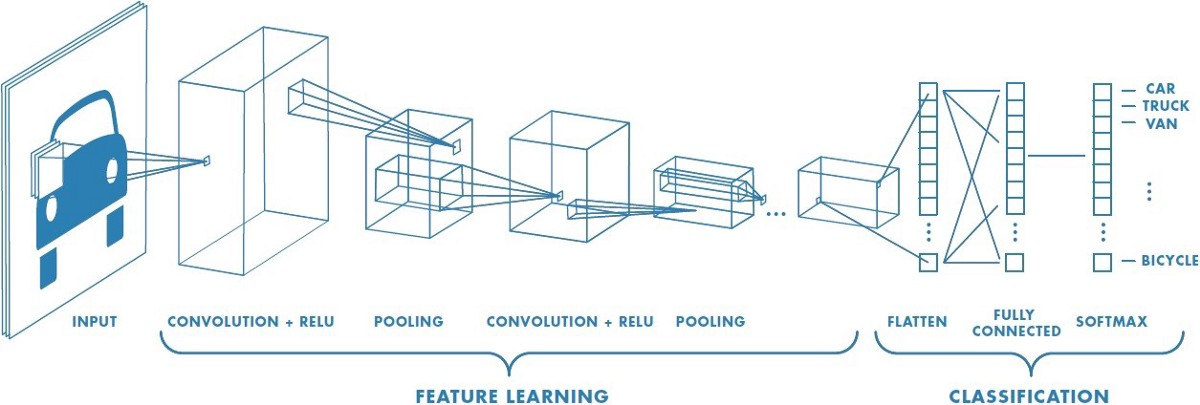


## Let's test our model

## Now let's train a pretrained model

NameError: ignored